<h1 align="center"><b> TELECOM CHURN ANALYSIS </b></h1>

**Wait!! Before we begin, Let's discuss what is Churn rate?** 
<br>
The rate at which customers stop doing business with a company("Orange Telecom"). It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.

**In this analysis we will find out:**


*   How much is the Churn rate?
*   What are the key factors that are responsible for customer churn?
*   Recommendations to ensure customer retention.



# Import the necessary libraries

In [1]:
# Import the Data wrangling libraries 
import numpy as np 
import pandas as pd

# Import the Data Visualization Libraries 
import matplotlib.pyplot as plt
import seaborn as sns

#Show 30 rows without hiding any data
pd.options.display.max_columns = 50

In [2]:
# Because our date is stored in a google drive.
# To import the dataset, first we have to mount the google drive.
from google.colab import drive
# Location in google colab
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read Telecom Churn csv(our dataset) file.
df = pd.read_csv("/content/drive/My Drive/Projects/Data/Telecom_Churn.csv")

# **Lets meet with our data**

* State: States code.

* Account Length: period for which the Account is active.

* Area Code: Area code having States

* International Plan: International Plan has subscribed or not subscribed by the customer.

* Voice Mail Plan: Yes: Voice Mail Plan has subscribed or not subscribed by the customer.

* Number vmail messages: Number of voice mail messages

* Total day minutes: Total number of minutes spent in day

* Total day calls: Total number of Calls made in day.

* Total day charge: Total charge for all call made in day.

* Total eve minutes: Total number of minutes spent in evening

* Total eve calls: Total number of calls made in evening.

* Total eve charge: Total charge for all the call made in evening.

* Total night minutes: Total number of minutes Spent in the Night.

* Total night calls: Total number of Calls made in Night.

* Total night charge: Total charge for call made in Night.

* Total intl minutes: Total number of minutes spent in international calls.

* Total intl calls: Total number of call made internationally.

* Total intl charge: Total charge for all the international call.

* Customer service calls : Number of customer service calls made by customer

* Churn : True means customer churned and False means customer retained.

In [4]:
# Check first 5 rows from our data set.
df.head()
# return n(by default 5) rows from our dataset. It helps in understanding our data and check whether we have right data in our dataset.

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# Check last 5 rows from our data set.
df.tail()
# Like head, tail is use to check last 5 rows and verify that everything is in place.

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


# EDA



In [6]:
# Lets make concise summary of our dataset.
# Info method is used to check index and columns data type.
# It also give information about missing data and memory usage. 
df.info()
# As we can see there is no missing data so thats a relief.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
# As we can see there is lot of Numeric(float and int) columns
# Describe method gives us descriptive statistics about all numeric columns.
# We can see dispersion in our data and shape of dataset's distribution.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [8]:
# We already know there is no missing values here(from our info method), But there is no harm in double check.
# As they say "Prevention is better than cure".
# It gives us if any column has missing value. 
print(df.isnull().sum().max())
# By this we are sure there are not any missing values in our dataset.

0


## Analysis Time!
**Observations:**
<br>

1.   'Total day minutes', 'Total eve minutes', 'Total night minutes' and 'Total intl minutes' are perfectly correlated with 'Total day charge', 'Total eve charge', 'Total night charge' and 'Total intl charge', Which makes sense because more the time of talk is more the charge is.
2.  Also, more the 'Customer service calls' more the probability of customer churn.

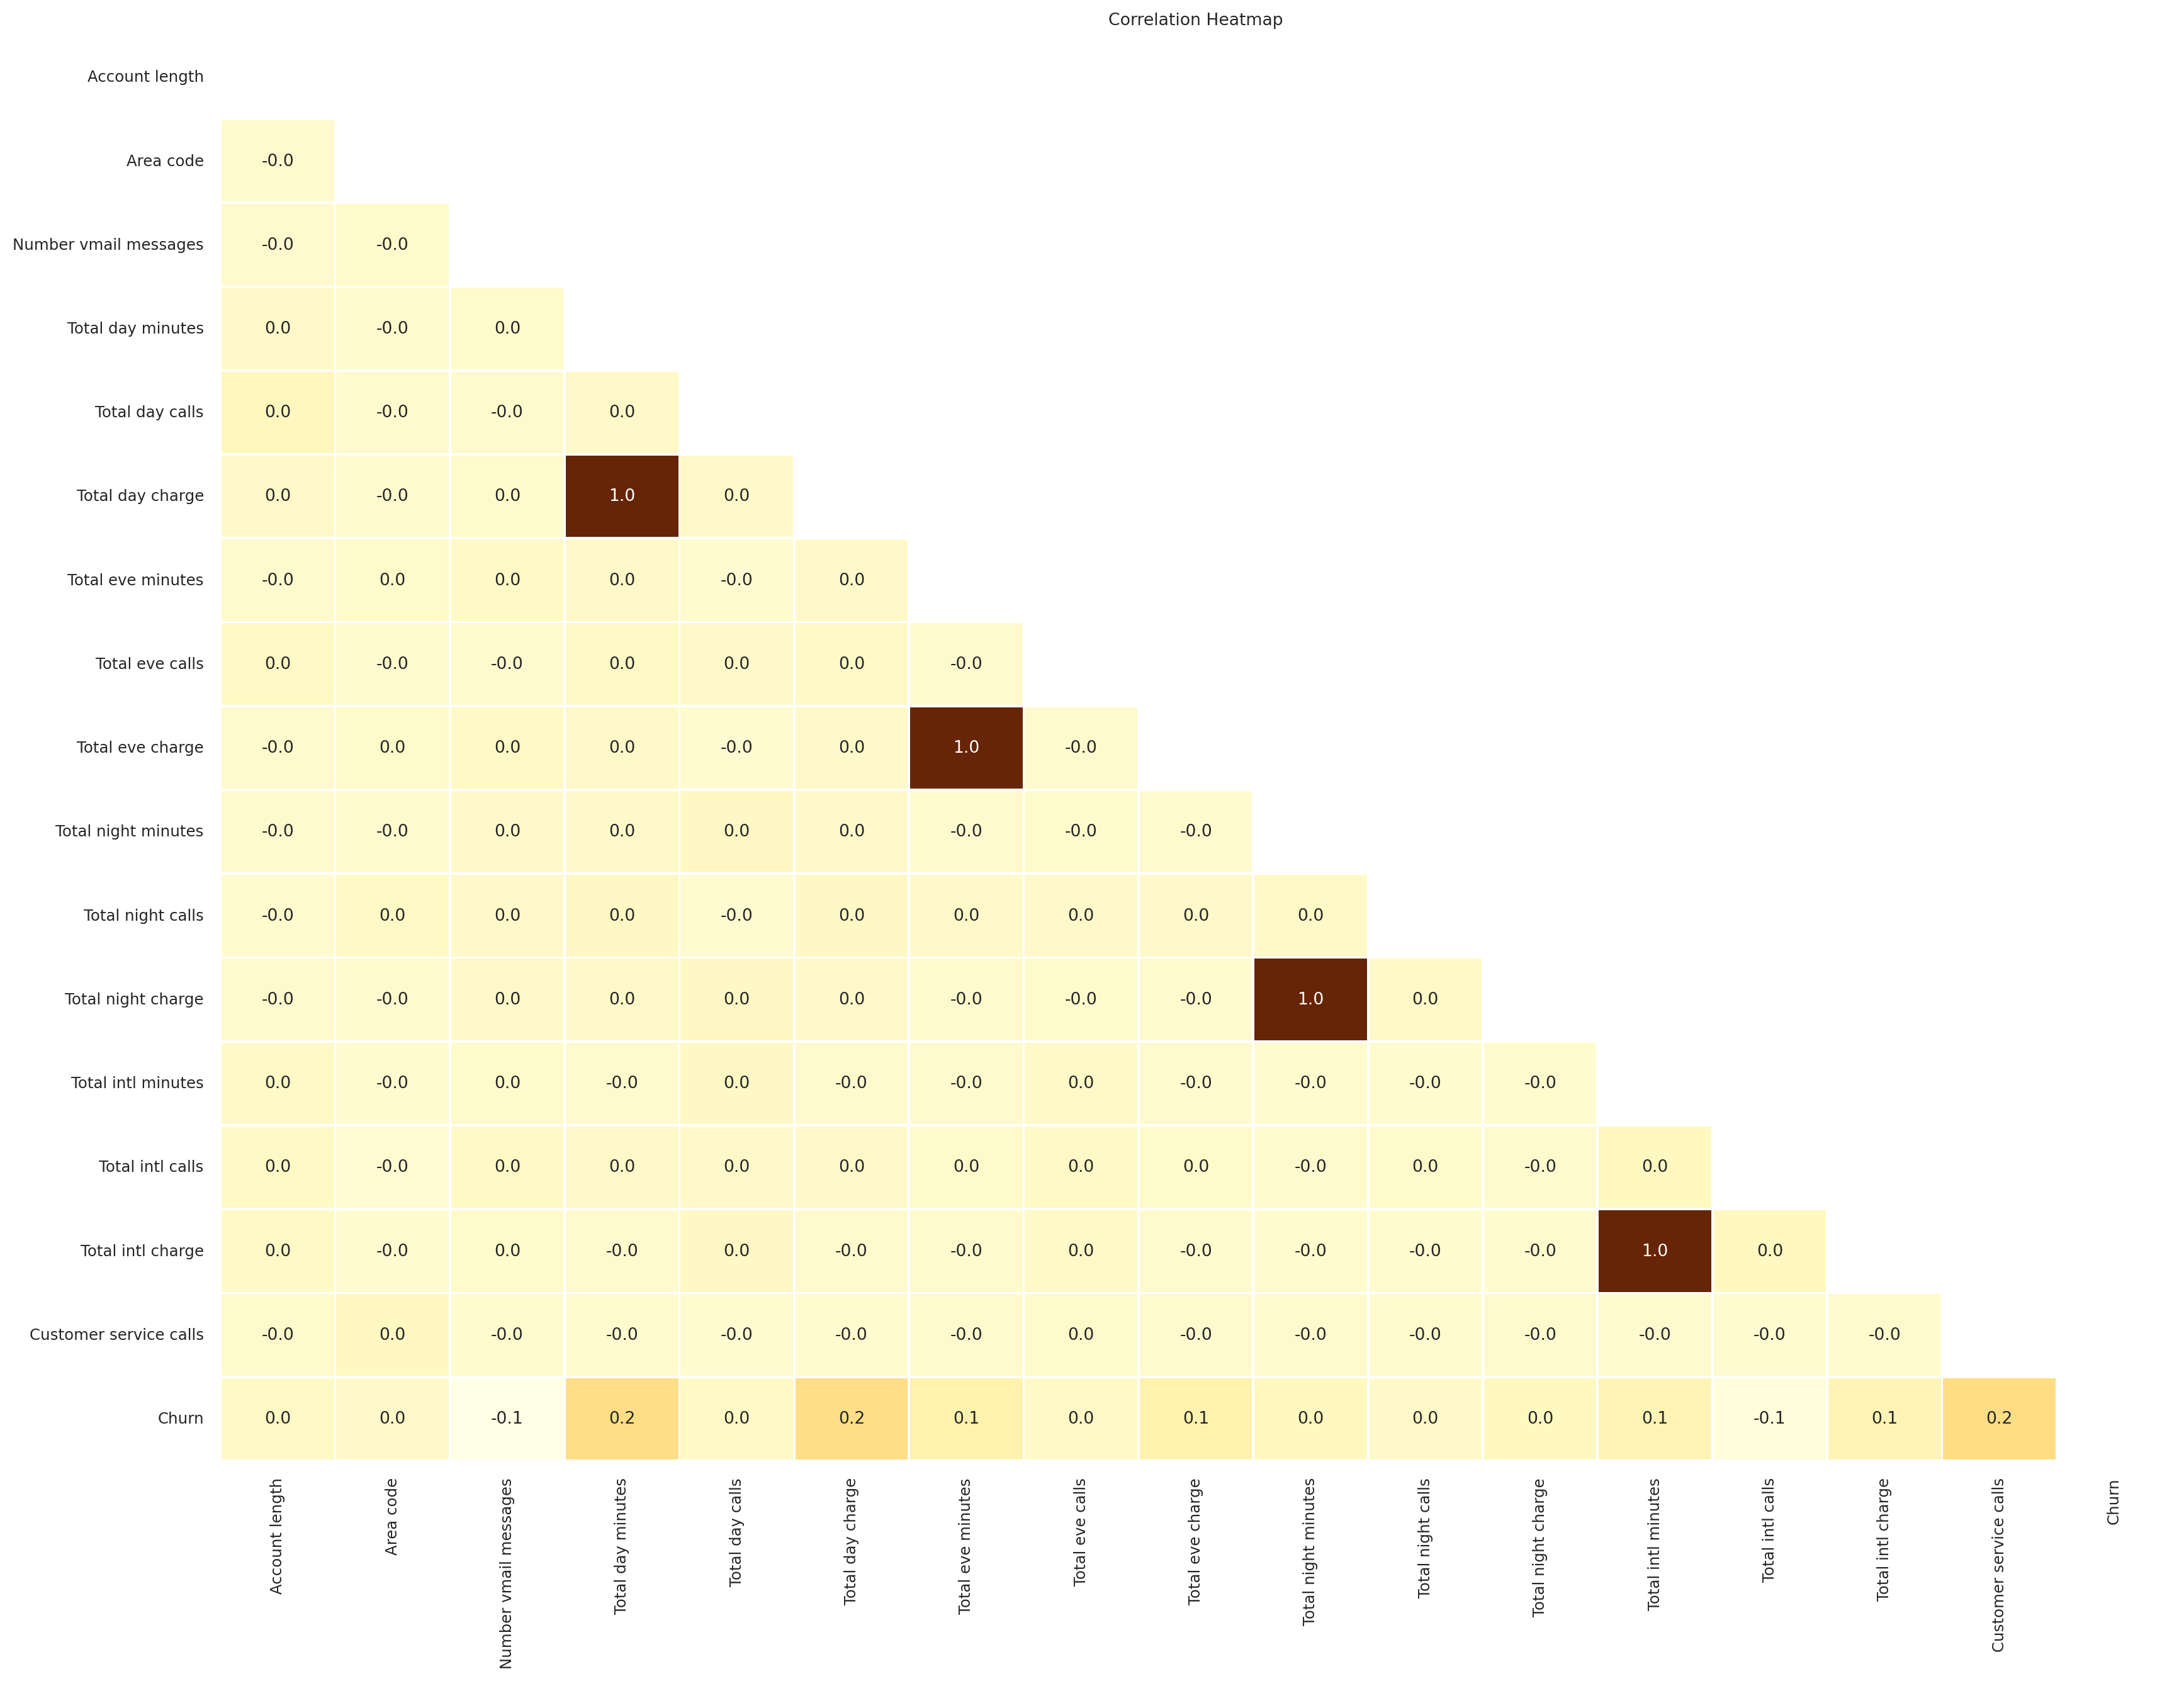

In [9]:
# Show numerical correlations(pearson) between columns on heatmap.
sns.set(font_scale=0.8, style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 15), dpi=200)
plt.title("Correlation Heatmap")
sns.heatmap(corr, 
           annot=True, # write the data value in each cell.
           fmt='.1f', # Format the float value to one place after decimal.
           mask=mask, # We only need half heatmap, other half is exactly the same.
           cmap="YlOrBr", # Color Yellow Orange Brown
           linewidths=1, # Width of the lines that will divide each cell
           cbar=False); # We don't need color bar.

### Univariate analysis
Lets understand the categorical variable one by one.
<br>
**Observation**


*   Overall Customer Churn rate = 14.49%
*   In 'State' Look for (**NJ, TX, MD, MI)** and also look for **'CA'**. These are the states with the top five churn rates. And **'WV'** has the lowest churn rate, So we can learn from **'WV'**, What are there working so good and apply that model or solution to top churn rate states. (Low network connectivity may be a possible problem).
*   Customer with **international plan** has almost the same churn rate as retention rate.
So there is a problem here that needs to be solved to retain the customers. (It can be high charges and connectivity issues.)
*   There is a problem with **customer service experience**, After three calls there is a great increase in churn rate. (By improving the customer experience we can decrease customer churn.) 

### Categorical Data

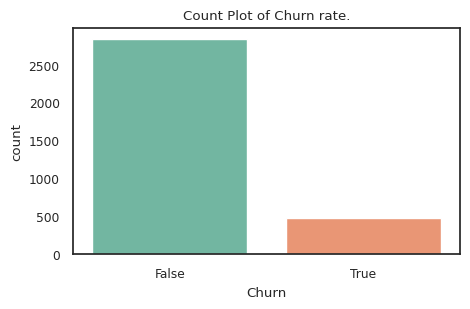

In [10]:
# Start with Churn rate
# Plot the customer churn.
# Set the figure
plt.figure(figsize=(5, 3), dpi=100)
plt.title("Count Plot of Churn rate.")
sns.countplot(x="Churn", data=df, palette="Set2");

In [11]:
True_churn_rate = df['Churn'].value_counts()[True]
churn_rate = round((True_churn_rate / len(df['Churn'])) * 100, 2)
# Save these values in new dataframe.
churn_df = pd.DataFrame({'Customers': [True_churn_rate, (len(df['Churn'])-True_churn_rate)], 'Rate(in %)':[churn_rate, (100-churn_rate)]}, index=['Churn', 'Not Churn'])
churn_df

,Customers,Rate(in %)
Churn,483,14.49
Not Churn,2850,85.51


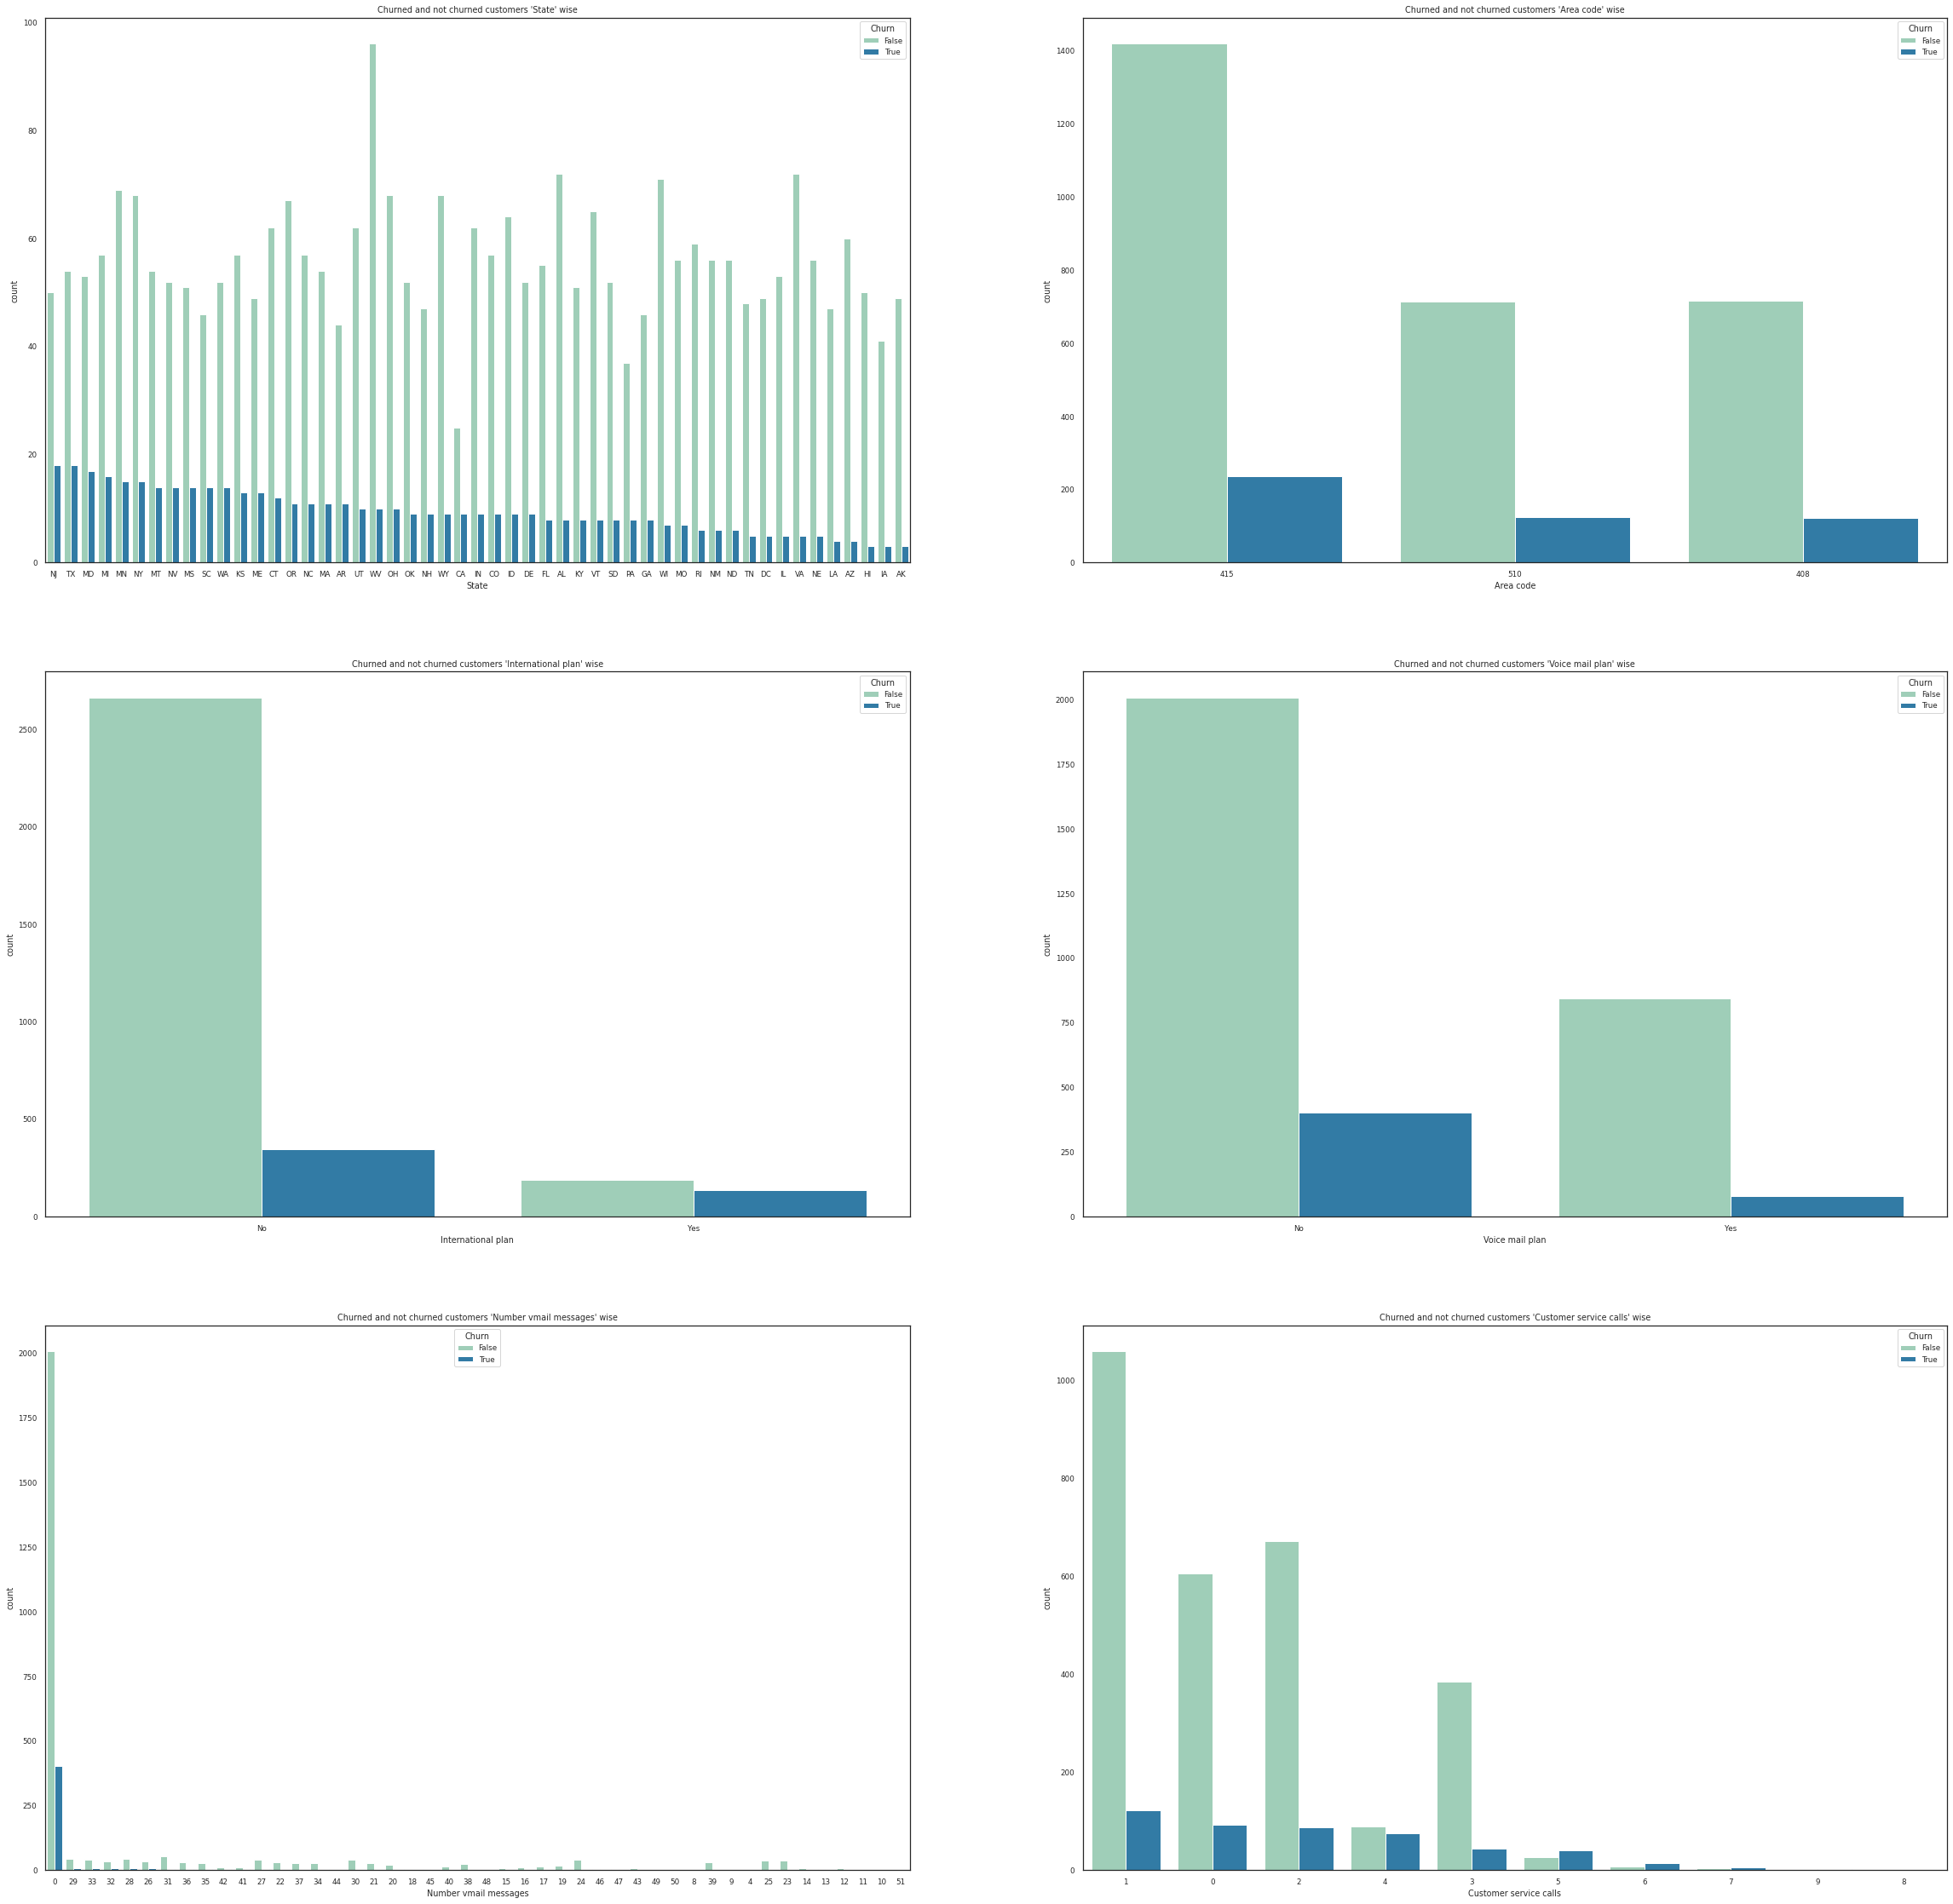

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(40, 40))
axes = axes.flatten()
# List of all categorical features(or columns) except 'Churn' which we saw earlier.
df_cat = ['State', 'Area code', 'International plan', 'Voice mail plan', 
          'Number vmail messages', 'Customer service calls', ]
# "A picture is worth a thousand words".          
for col, ax in zip(df_cat, axes):
    # In decreasing order of Churned customer.
    sorted_values = df.groupby(col)['Churn'].sum().sort_values(ascending=False).index
    sns.countplot(x=col,
      data = df,
      hue='Churn',
      order=sorted_values,
      palette="YlGnBu",
      ax=ax);
    ax.set_title(f"Churned and not churned customers '{col}' wise")

In [13]:
list_of_states = df['State'].value_counts().index

In [14]:
# List of all states
list_of_states

Index(['WV', 'MN', 'NY', 'AL', 'WI', 'OH', 'OR', 'WY', 'VA', 'CT', 'MI', 'ID',
       'VT', 'TX', 'UT', 'IN', 'MD', 'KS', 'NC', 'NJ', 'MT', 'CO', 'NV', 'WA',
       'RI', 'MA', 'MS', 'AZ', 'FL', 'MO', 'NM', 'ME', 'ND', 'NE', 'OK', 'DE',
       'SC', 'SD', 'KY', 'IL', 'NH', 'AR', 'GA', 'DC', 'HI', 'TN', 'AK', 'LA',
       'PA', 'IA', 'CA'],
      dtype='object')

In [15]:
number_of_vmail_messages = df["Number vmail messages"].value_counts()

In [16]:
# Count of voice mail messages
pd.DataFrame(np.array(number_of_vmail_messages).reshape(1, -1), index=['Number of voice mail messages'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
Number of voice mail messages,2411,60,53,51,46,44,44,42,41,41,37,36,34,32,32,30,29,29,28,25,22,19,16,15,14,13,13,9,9,7,7,7,6,6,4,4,3,2,2,2,2,2,1,1,1,1


### Numerical Data
**Observation:**
<br>
*   Distribution of Total day calls and Total eve calls are negatively skewed whereas the distribution of Total international calls is positively skewed. (Means some customers who have 0-50 calls in day and eve.)
*   Total international calls are comparatively very less than other types of calls which makes sense because not every customer does a lot of international calls.

Text(0.5, 1.0, 'Distribution of Account length')

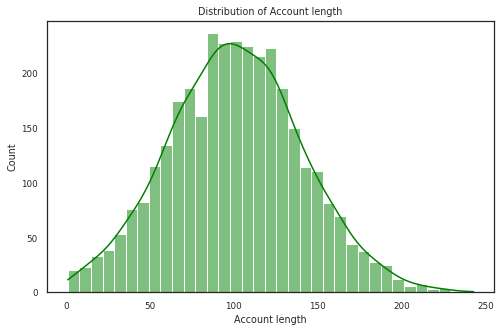

In [17]:
# Distribution plot for account length
plt.figure(figsize=(8, 5))
sns.histplot(df['Account length'], kde=True, color='green' );
plt.title('Distribution of Account length')

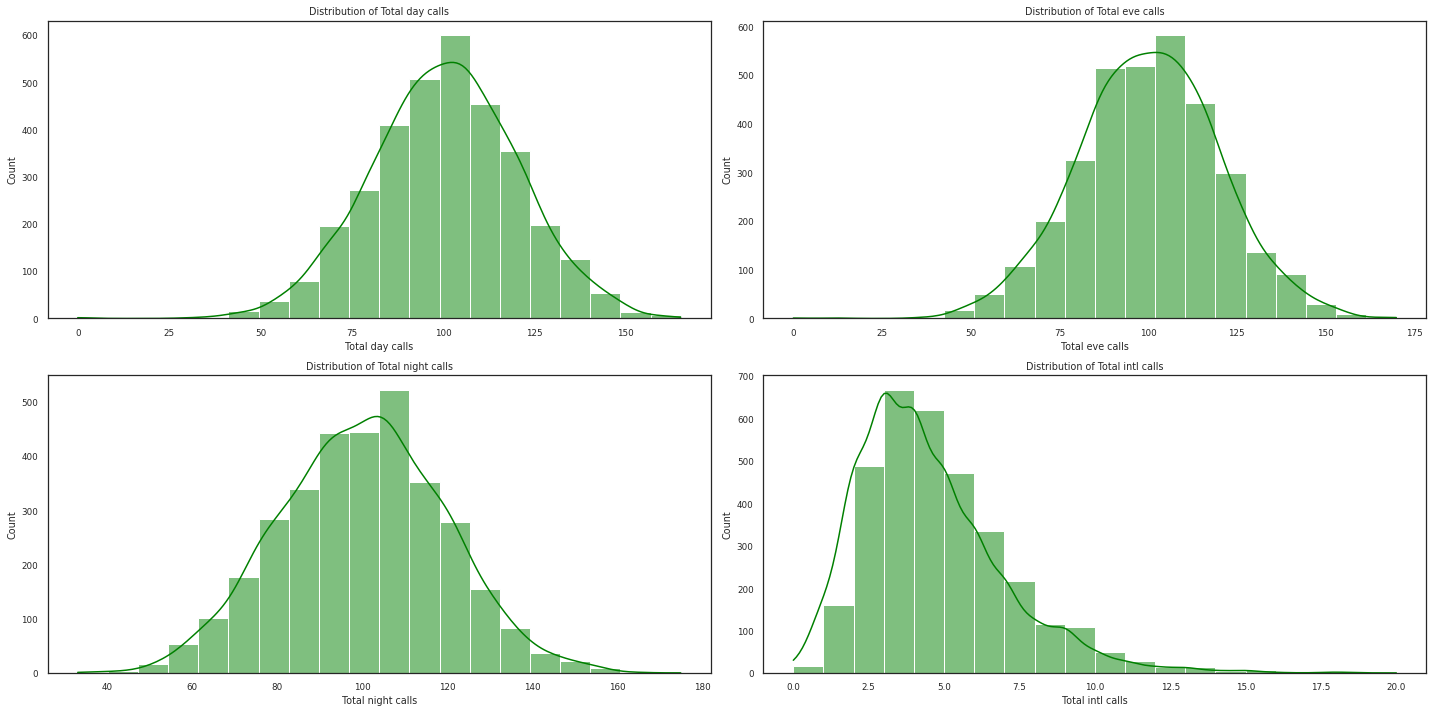

In [18]:
# Lets make it one plot that contains all plot we needed
# We have four types of call (day, eve, night, international)
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()

list_of_calls = ['Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls']

for col, ax in zip(list_of_calls, axes):
  sns.histplot(x=col,
               data=df,
               kde=True,
               bins=20,
               color='green',
               ax=ax);
  ax.set_title(f'Distribution of {col}')
plt.tight_layout()

### Bivariate analysis
Let's analyze Numerical features(or columns) with the 'Churn' rate.

**Observation:**

*   We can't say much about 'Account length' and the Customer  Churn.
*   It looks like people who have spent **more minutes on the day** call has a high churned rate. (High charges seem to be the problem here because more time spent on call means more charges and hence more churned customers.)
*   There is not much relationship between **eve and night call** with the churned customer.
* We've already discussed **international calls**, High charges seem to be the problem.



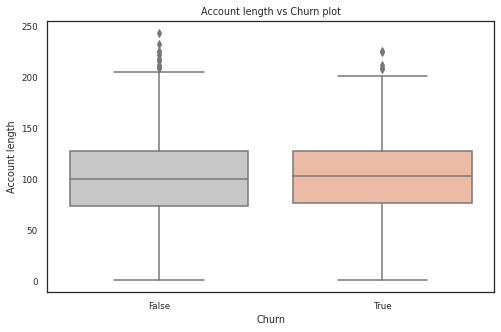

In [19]:
# Analyse account length with churn.
# Boxplot is here to help with its boxes.
# Lets box it up..
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn',
            y='Account length',
            data = df,
            palette="RdGy_r",);
plt.title('Account length vs Churn plot');

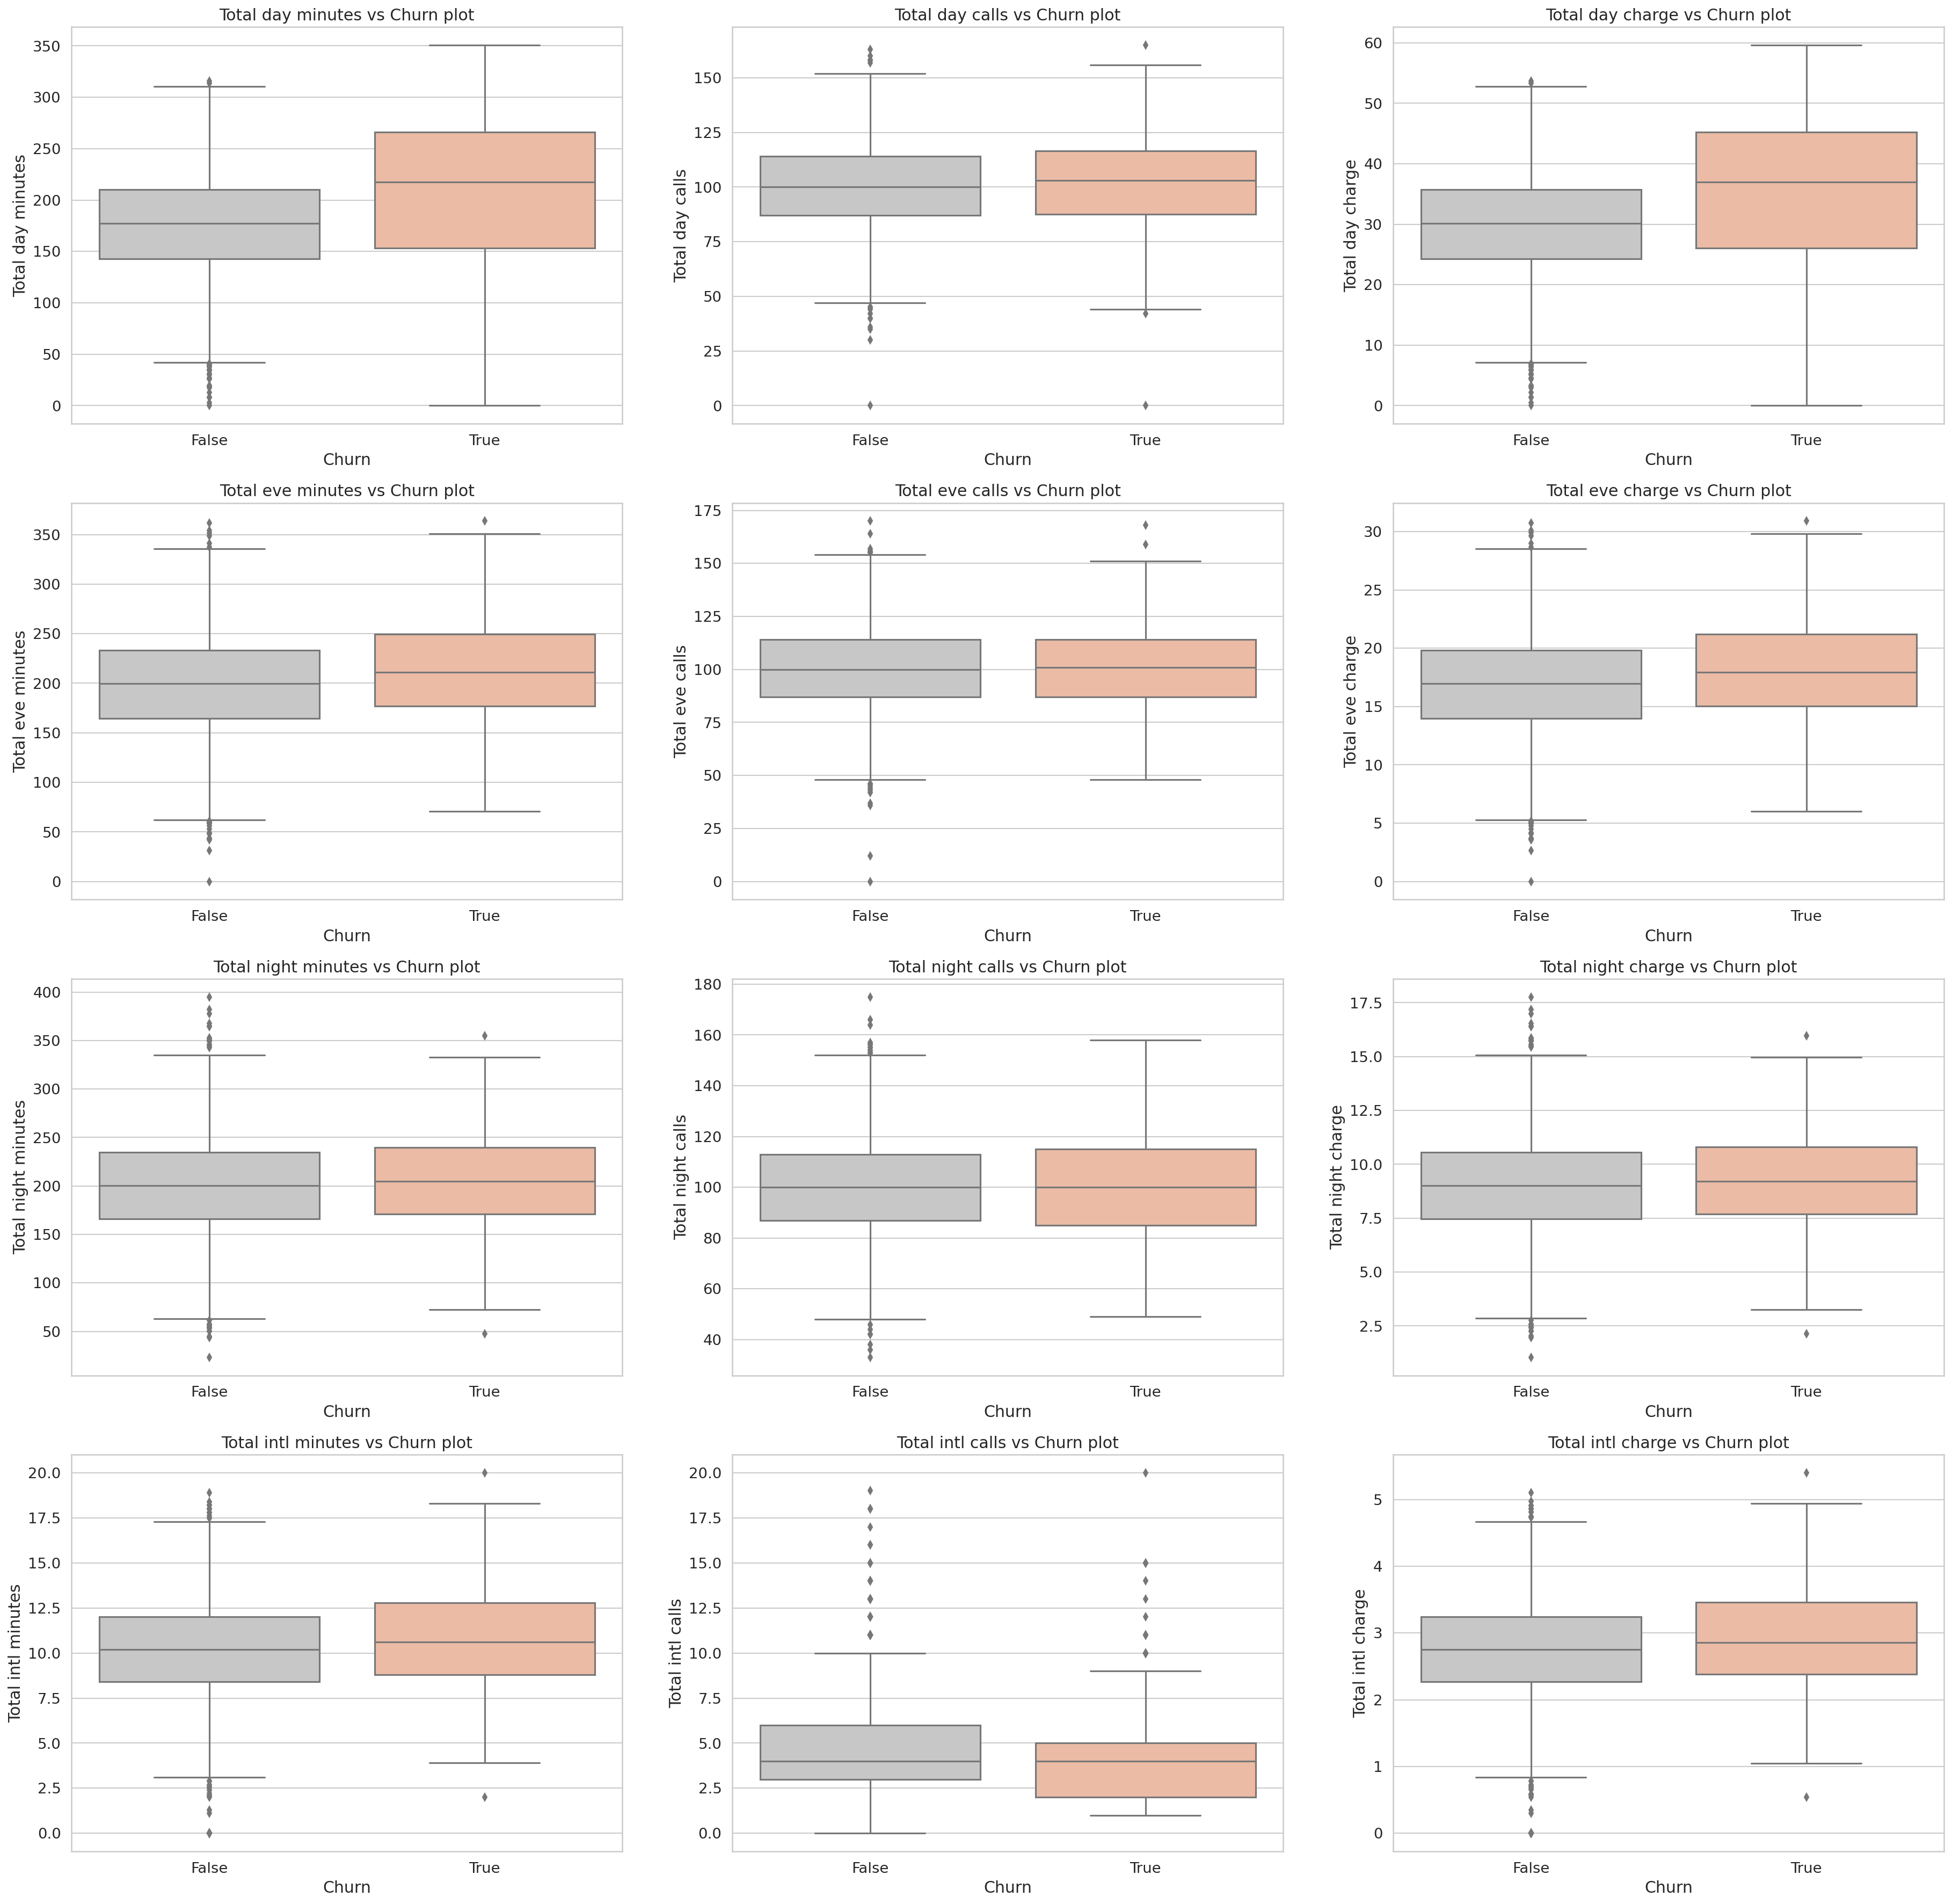

In [20]:
sns.set(font_scale=1.2, style="whitegrid")

fig, axes = plt.subplots(4, 3, figsize=(30, 30), dpi=150)
axes = axes.flatten()

total_list = ['Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Churn']

for col, ax in zip(total_list, axes):
    sns.boxplot(x='Churn',
                y=col,
                data = df,
                palette="RdGy_r",
                ax=ax);
    ax.set_title(f'{col} vs Churn plot')

## Add new features:

**Observation:**


*   More the tariff charges more is the churn rate.
*   More the minutes of call more is the charges and hence more is the churn rate.
*   Total day minutes and Total day charge are perfectly correlated as we saw in our correlation heatmap.
*   Total eve minutes and Total eve charge are perfectly correlated as we saw in our correlation heatmap.
*   Total night minutes and Total night charge are perfectly correlated as we saw in our correlation heatmap.
*   Total international minutes and Total international charge are perfectly correlated as we saw in our correlation heatmap.  


In [21]:
# Lets add all charges and make one column 'Total charges'
df['Total charges'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']
# Lets add all minutes and make one column 'Total minutes'
df['Total minutes'] = df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes'] + df['Total intl minutes']

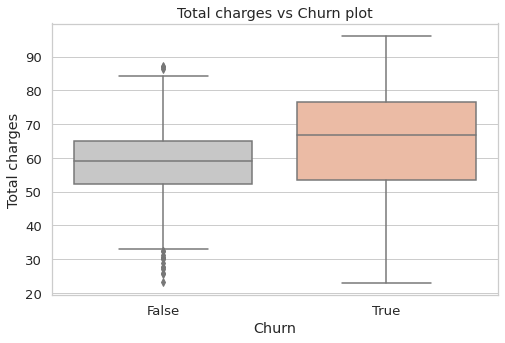

In [22]:
# Analyse Total charges with churn.
# Boxplot is here to help with its boxes.
# Lets box it up..
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn',
            y='Total charges',
            data = df,
            palette="RdGy_r",);
plt.title('Total charges vs Churn plot');

In [23]:
def plot_scatter_plot(x, y, data, hue='Churn', alpha=0.7, palette='Set2'):
  """
  Plot scatter plot.
  x, y: variable that specify positions on the x and y axis.
  data: pandas.DataFrame (Input data structure).
  hue: Grouping variable that will produce points with different colors.
  alpha: Proportional opacity of the points.
  palette: matplotlib.colors.Colormap (Method for choosing the colors to use when mapping the 'hue' semantic.)
  """
  
  plt.figure(figsize=(8, 5), dpi=100)
  sns.scatterplot(x=x, y=y, data=data, hue=hue, alpha=alpha, palette=palette);

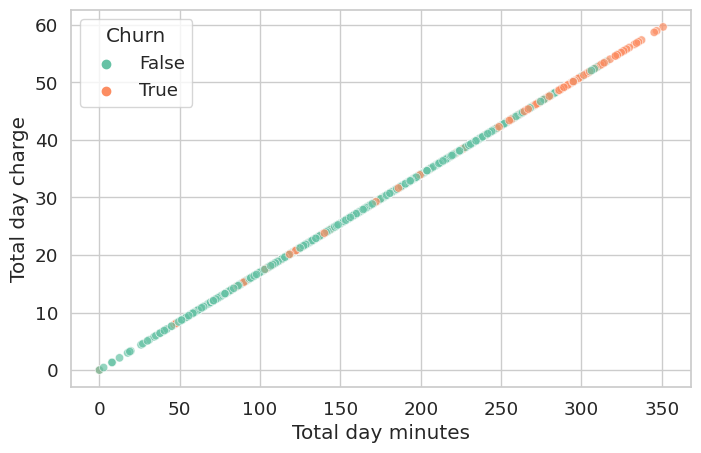

In [24]:
plot_scatter_plot(x='Total day minutes', y='Total day charge', data=df)

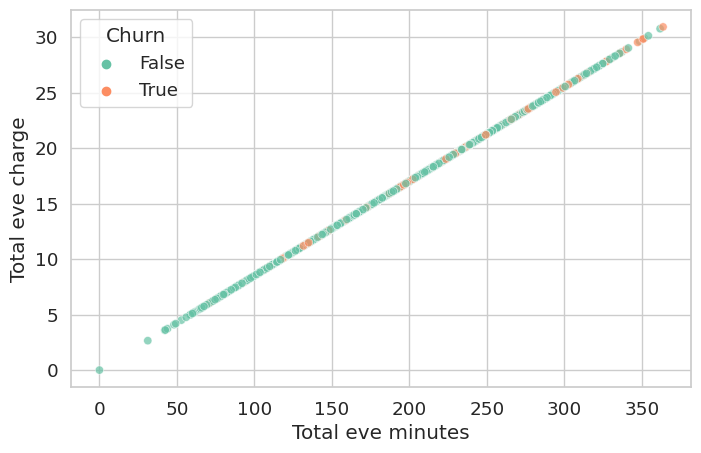

In [25]:
plot_scatter_plot(x='Total eve minutes', y='Total eve charge', data=df)

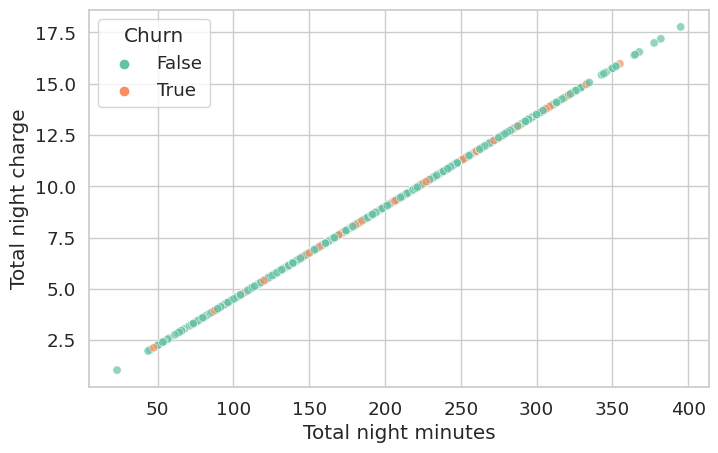

In [26]:
plot_scatter_plot(x='Total night minutes', y='Total night charge', data=df)

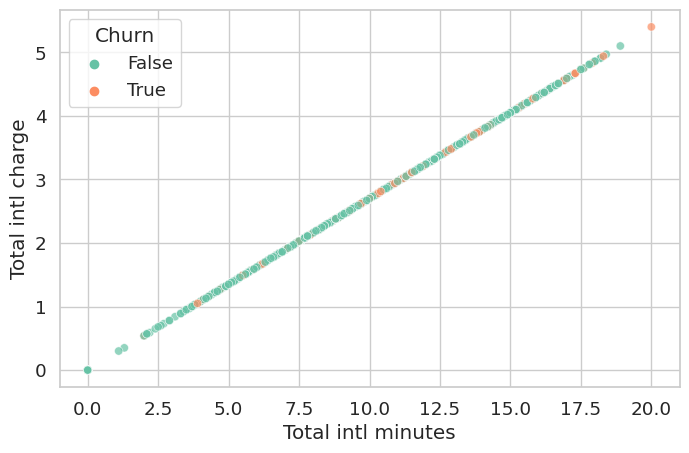

In [27]:
plot_scatter_plot(x='Total intl minutes', y='Total intl charge', data=df)

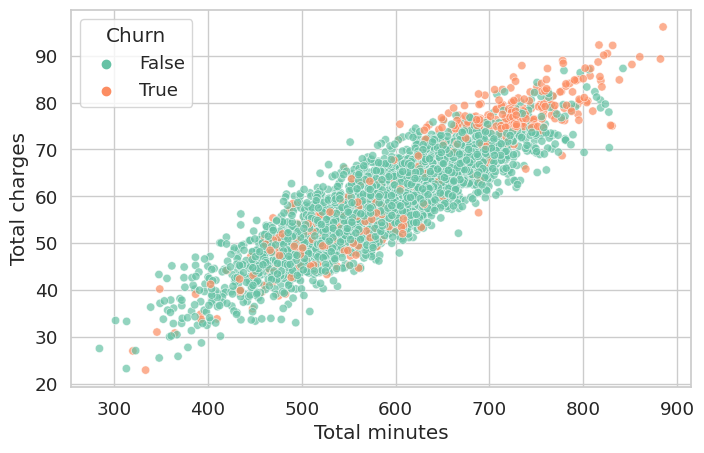

In [28]:
plot_scatter_plot(x='Total minutes', y='Total charges', data=df)

# Key Factors responsible for customer churn:
**Churn rate is 14.49%.**
   
1.   Some states (CA, NJ, TX, MD, MI, etc)are very high churn rates. And on the other hand state like 'WV' has the lowest churn rate, So we can learn from 'WV', And apply that to top churn rate states. (Low network connectivity may be a possible problem).
2.   Customers with an International plan have a high Churn rate compared to customers who have not taken an international plan. (High charges compared to a competitor might be a problem.)
3.   There is a problem with the customer service experience, After three calls there is a great increase in churn rate. (By improving the customer experience we can decrease customer churn.)
4. People who have spent more minutes on day call has a high churned rate. (High charges seem to be a problem here because more time spent on call means more charges and hence more churned customers.)
5. More the charges more is the Churn rate.





# Recommendations to ensure customer retention:


1.   Focus more on high churned states, Check whether competitor companies had low charges. Improve connectivity in these regions if connectivity is not good.
2. Need some changes in the International plan to make sure customer retention. Lower the tariff is a good starting point.
3.  By providing better customer service and trying to solve customer's problems in one call. 
4.   Customers, who have spent more time on day calls, are the ones who have high chance of leaving(Because of high charges). By giving them a good tariff plan. We can ensure their retention.  
